# **Getting started with Google Colab!**

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

# **What is Colab?**
A Colab notebook is an interactive coding environment hosted by Google Research. It is fundamentally a cloud-based **[Jupyter Notebook](https://jupyter.org/)** with additional features built-in to facilitate data intensive workflow development.  Whether you're new to coding, or a veteran, Colab can make your work easier. Plus, since Colab notebooks execute code on Google's cloud servers, you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your own machine. All you need is a browser.

A Colab notebook consists of a list of cells that contain either **text** or **code** -- and potentially the code's output.  **Click a cell to select it.**

Expand and run the code in each subsection below to see a few of Colab's powerful built in tools.

#**The basics of Colab notebooks**

## Text cells
This is a **text cell**. To **enter edit mode**:

*   **double-click** in the cell,
*   select the **pencil icon** in the popup toolbar (top right of cell).

To **exit edit mode**,
*   click any other cell
*   select the pencil icon with the line through it.

Text cells use markdown syntax. Using markdown "**Headings**" helps keep notebooks organized in an outline format.  Headings also allow you to expand/collapse a series of cells and populate the "**Table of contents**" in the left frame, which can be very useful for navigating large notebooks.

Equations can be rendered in text cells using [LaTeX](http://www.latex-project.org/) and [MathJax](https://www.mathjax.org). Just place the statement
within a pair of **\$** signs. For example `$\sqrt{3x-1}+(1+x)^2$` becomes
$\sqrt{3x-1}+(1+x)^2.$

To learn more, see the [markdown guide](/notebooks/markdown_guide.ipynb).


## Code cells
Below is a **code cell**. Click in the cell to select it and execute the contents in the following ways:

* Click the **Play icon** in the left gutter of the cell;
* Type **Cmd/Ctrl+Enter** to run the cell in place;
* Type **Shift+Enter** to run the cell and move focus to the next cell (adding one if none exists); or
* Type **Alt+Enter** to run the cell and insert a new code cell immediately below it.

There are additional options for running some or all cells in the **Runtime** menu.

Code cells are "**code aware**" and have many helpful feature - like color coding & auto complete - to help you write code.

In [ ]:
a = 10
a

10

## Adding, Deleting and Moving cells
You can **add** new cells by using the **+ CODE** and **+ TEXT** buttons that show when you hover between cells. These buttons are also in the toolbar above the notebook where they can be used to add a cell below the currently selected cell.

You can **delete** cells by using the **trash can icon** in the popup toolbar (top right of cell).

You can move a cell by selecting it and clicking **Up arrow** or **Down arrow** in the popup toolbar (top right of cell).

Consecutive cells can be selected by "lasso selection" by dragging from outside one cell and through the group.  Non-adjacent cells can be selected concurrently by clicking one and then holding down Ctrl while clicking another.  Similarly, using Shift instead of Ctrl will select all intermediate cells.

##Interupting code execution
You may run into situations where you need to stop the code before it finishes running.

To interupt an actively running code cell you can:
* Click the **Stop icon** in the left gutter of the cell;
* Type **Ctrl+M I**;
* Go to  **Runtime** in the top menu bar and click **Interrupt execution**

Run the following cell and try the interupts.

In [ ]:
import time
print("Sleeping")
time.sleep(30) # sleep for a while; interrupt me!
print("Done Sleeping")

Sleeping


KeyboardInterrupt: 

#**Tools for coding, analysis, and visualization in Python**

## Automatic completions and exploring code

Colab provides automatic completions to explore attributes of Python objects, as well as to quickly view documentation strings. As an example, first run the following cell to import the  [`numpy`](http://www.numpy.org) module.

In [ ]:
import numpy as np

If you now insert your cursor after `np` and press **Period**(`.`), you will see the list of available completions within the `np` module. Completions can be opened again by using **Ctrl+Space**.

In [ ]:
np

If you type an open parenthesis after any function or class in the module, you will see a pop-up of its documentation string:

In [ ]:
np.ndarray

The documentation can be opened again using **Ctrl+Shift+Space** or you can view the documentation for method by mouse hovering over the method name.

When hovering over the method name the `Open in tab` link will open the documentation in a persistent pane. The `View source` link will navigate to the source code for the method.

## Most popular Python packages are pre-installed

Having packages pre-installed and optimized for the computing environment can dramatically reduce the time necessary to go from idea to insight. Colab includes most of the scientific Python stack by default — **NumPy, pandas, SciPy, matplotlib, seaborn, scikit-learn**. Moreover, to install new and/or bio-specifc tools like biopython, `**!pip install biopython**` is all it takes!

###**EXAMPLE:** _All else being equal, how does the number of genotyped individuals affect our ability to detect causal variants in GWAS?_
The code cell below performs a Genome Wide Association Study (**GWAS**) on some similated data.  It uses **numpy** to generate random DNA variant (SNP) and phentype data for 800 individuals, then uses **scipy** to analyze it statistically, and **matplotlib** to create a Manhattan plot visualizing the results.

* Run the code multiple times to see how the simulated data affect the plot.  
* Try halving the number of individuals to see how it affects causal inference.

If it isn't clear how to modify the number of individuals in the study, come back to this example after you've seen how to use **Gemini** to assist.

####Show/Hide Cells & Outputs:
You can show/hide **entire cells and their output** hierarchically according to heading level by toggling the ">" arrow next to the heading. For example, hide all the code an output for this GWAS by toggling the arrow at the top of this cell.

You can also clear or hide **just the outputs** by clicking the icon in the left gutter of the output area and chosing either **Clear output** or **Show/hide output**

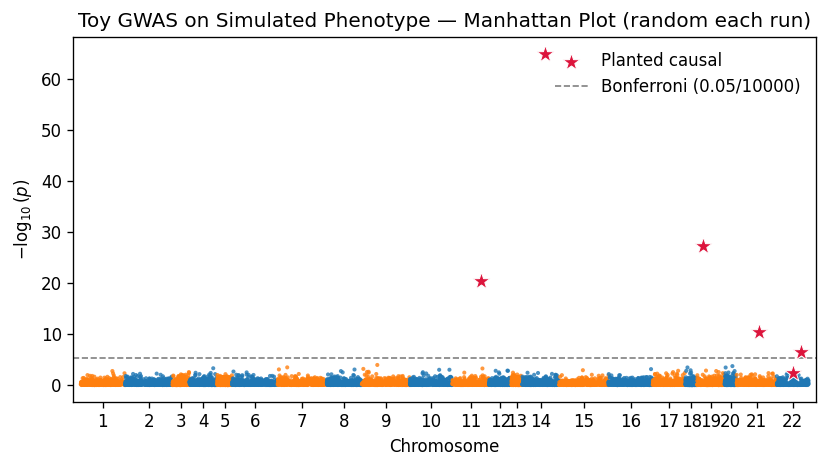

Top SNPs (index, chr, pos, p-value):
  6156  chr14  2,240,933,083   p=9.43e-66  <-- causal
  8316  chr19  3,005,618,348   p=4.39e-28  <-- causal
  4863  chr11  1,932,558,718   p=4.24e-21  <-- causal
  9364  chr21  3,274,589,150   p=3.31e-11  <-- causal
  9907  chr22  3,478,302,316   p=2.83e-07  <-- causal


In [ ]:
# This cell simulates a tiny GWAS-style analysis fully in-memory and
# produces a Manhattan plot.

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# ----- simulation settings (keep small for speed) -----
N = 800                 # individuals
M = 10_000              # SNPs
N_CHR = 22              # chromosomes
N_CAUSAL = 6            # number of planted causal variants

rng = np.random.default_rng()  # no seed -> fresh randomness each run

# ----- assign SNPs to chromosomes and positions -----
snps_per_chr = rng.multinomial(M, np.ones(N_CHR) / N_CHR)
chr_ids = np.concatenate([np.full(k, i+1) for i, k in enumerate(snps_per_chr)])

# Random chromosome lengths (~50–250 Mb) and per-SNP positions
chr_lengths = rng.integers(50_000_000, 250_000_000, size=N_CHR)
positions = np.empty(M, dtype=np.int64)
idx = 0
for c in range(N_CHR):
    k = snps_per_chr[c]
    positions[idx:idx+k] = np.sort(rng.integers(1, chr_lengths[c]+1, size=k))
    idx += k

# Sort SNPs by (chr, pos)
order = np.lexsort((positions, chr_ids))
chr_ids = chr_ids[order]
positions = positions[order]

# ----- simulate genotypes (0/1/2) -----
mafs = rng.uniform(0.05, 0.5, size=M)
mafs = mafs[order]  # align to sorted SNP order
G = rng.binomial(2, mafs, size=(N, M)).astype(np.int8)

# ----- pick RANDOM causal SNPs anywhere in the genome -----
causal_idx = rng.choice(M, size=N_CAUSAL, replace=False)
beta = rng.normal(0.8, 0.15, size=N_CAUSAL) * rng.choice([-1, 1], size=N_CAUSAL)

# quantitative phenotype: y = G[:, causal] @ beta + noise
y_signal = np.sum(G[:, causal_idx] * beta, axis=1)
y = (y_signal + rng.normal(0, 1.0, size=N)).astype(np.float64)
y -= y.mean()
y /= y.std(ddof=1)

# ----- per-SNP association via correlation -> t-test p-values -----
X = G.astype(np.float32)
n = float(N)
mean_x = X.mean(axis=0)
mean_y = y.mean()
sum_xy = X.T @ y
sxy = sum_xy - n * mean_x * mean_y
sxx = (X.astype(np.float64)**2).sum(axis=0) - n * (mean_x**2)
syy = (y**2).sum() - n * (mean_y**2)
r = sxy / np.sqrt(sxx * syy + 1e-12)

df = N - 2
tstat = r * np.sqrt(df / np.maximum(1e-12, 1 - r**2))
pvals = 2 * stats.t.sf(np.abs(tstat), df)

# ----- prep for Manhattan plot -----
neglogp = -np.log10(np.clip(pvals, 1e-300, 1))
# genomic x-axis: cumulative offsets by chromosome
xticks, xticklabels = [], []
cum = 0
for c in range(1, N_CHR+1):
    mask = (chr_ids == c)
    if not np.any(mask):
        continue
    positions[mask] += cum
    xticks.append((positions[mask].min() + positions[mask].max()) // 2)
    xticklabels.append(str(c))
    cum = positions[mask].max() + 1

bonf_alpha = 0.05 / M
bonf_line = -np.log10(bonf_alpha)

# ----- plot -----
plt.figure(figsize=(7, 4), dpi=120)   # adjust the size of the figure
colors = np.array(['#1f77b4', '#ff7f0e'])
colormap = colors[(chr_ids % 2)]  # alternate by chromosome
plt.scatter(positions, neglogp, c=colormap, s=6, linewidths=0, alpha=0.8)

# highlight causal
plt.scatter(positions[causal_idx], neglogp[causal_idx],
            marker='*', s=120, c='crimson', edgecolor='white', linewidth=0.6,
            zorder=3, label='Planted causal')

plt.axhline(bonf_line, color='grey', linestyle='--', linewidth=1,
            label=f'Bonferroni (0.05/{M})')

plt.xticks(xticks, xticklabels)
plt.xlabel('Chromosome')
plt.ylabel(r'$-\log_{10}(p)$')
plt.title('Toy GWAS on Simulated Phenotype — Manhattan Plot (random each run)')
plt.margins(x=0.01)
plt.legend(frameon=False, loc='upper right')
plt.tight_layout()
plt.show()

# quick report of top hits
top = np.argpartition(pvals, 5)[:5]
top = top[np.argsort(pvals[top])]
print("Top SNPs (index, chr, pos, p-value):")
for t in top:
    tag = "  <-- causal" if t in causal_idx else ""
    print(f"{t:6d}  chr{int(chr_ids[t]):02d}  {int(positions[t]):>10,d}   p={pvals[t]:.2e}{tag}")


## Interactive visualizations
Colab notebooks aren't limited to static text and figure outputs. They can be even more interesting!

The code below simulates a DNA sequence and then creates a plot that allows you to Pan, Zoom, and Hover to explore the GC profiles.

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px

n = 10_000
seq = np.random.default_rng().choice(list("ACGT"), n, p=[.2,.3,.3,.2])
gc  = ((seq=='G') | (seq=='C')).astype(int)
k   = 100  # window size
gcw = np.convolve(gc, np.ones(k), 'valid') / k
pos = np.arange(len(gcw)) + k//2

fig = px.scatter(x=pos, y=gcw, title="Interactive GC% (100-bp window)", render_mode="webgl", height=400)
fig.update_traces(mode="lines", hovertemplate="pos=%{x}<br>GC=%{y:.2f}")
fig.update_layout(xaxis_title="Position", yaxis_title="GC fraction")
fig.show()

## Integration with Drive

Colab is integrated with Google Drive. It allows you to share, comment, and collaborate on the same document with multiple people:

* The **SHARE** button (top-right of the toolbar) allows you to share the notebook and control permissions set on it.

* **File->Make a Copy** creates a copy of the notebook in Drive.

* **File->Save** saves the File to Drive. **File->Save and checkpoint** pins the version so it doesn't get deleted from the revision history.

* **File->Revision history** shows the notebook's revision history.

## Commenting on a cell
You can comment on a Colaboratory notebook like you would on a Google Document. Comments are attached to cells, and are displayed next to the cell they refer to. If you have **comment-only** permissions, you will see a comment button on the top right of the cell when you hover over it.

If you have edit or comment permissions you can comment on a cell in one of three ways:

1. Select a cell and click the comment button in the toolbar above the top-right corner of the cell.
1. Right click a text cell and select **Add a comment** from the context menu.
3. Use the shortcut **Ctrl+Shift+M** to add a comment to the currently selected cell.

You can resolve and reply to comments, and you can target comments to specific collaborators by typing *+[email address]* (e.g., `+user@domain.com`). Addressed collaborators will be emailed.

The Comment button in the top-right corner of the page shows all comments attached to the notebook.

# **...but not *just* for Python**

## Magics
Colab shares the notion of magics from Jupyter. There are shorthand annotations that change how a cell's text is executed. For example, you can run Unix shell scripts, html, or R code.

To learn more, see [Jupyter's magics page](http://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Cell%20Magics.ipynb).

The examples below demonstrate cells that are interpreted and executed as Unix(bash) and html code.


In [ ]:
%%bash
printf "ATGACGTT\nACGTA\nACGTT\nATGGCGTA\nTTTTT\n" > seqs.txt
wc -l < seqs.txt > seqs_out.txt
grep -n '^ATG' seqs.txt >> seqs_out.txt
cat seqs_out.txt

5
1:ATGACGTT
4:ATGGCGTA


In [ ]:
%%html
<marquee style='width: 30%; color: blue;'><b>Bioinformatics Supercharged by Colab!</b></marquee>

In [ ]:
%%html
<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 450 400" width="200" height="200">
  <rect x="80" y="60" width="250" height="250" rx="20" style="fill:red; stroke:black; fill-opacity:0.7" />
  <rect x="180" y="110" width="250" height="250" rx="40" style="fill:blue; stroke:black; fill-opacity:0.5;" />
</svg>

## Shortcuts to Unix system shell commands (bash)

Because system commands are commonly useful, notebooks have shortcuts for common operations, such as **`ls`**

In code cells, a leading ! runs the rest of the line in a system shell (bash) instead of Python.

In [ ]:
!echo $HOME

/root


In [ ]:
# This allows us to do things like use {} to pass info from Python into bash

# first we use python to define a variable "path"
#  and assign it the path to a sample_data directory
path = "/content/sample_data"

#next execute the ls -l command in bash, but pass the "path" variable using {}
!ls -l {path}

total 55504
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root   301141 Aug 28 13:42 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Aug 28 13:42 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Aug 28 13:43 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Aug 28 13:43 mnist_train_small.csv
-rwxr-xr-x 1 root root      962 Jan  1  2000 README.md


Some commands - like **`ls`** - are so common, Colab has built-in shortcuts called "**aliases**".

For example you don't need the `!` to run `ls` (note: `--color=always` is an option to the `ls` command that color codes the output by directory/file type.

In [ ]:
ls /content/sample_data --color=always

anscombe.json*                mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md*


###To see the other aliases colab includes run the code below.

In [ ]:
!bash -i -lc 'alias | sort' 2>/dev/null

alias egrep='egrep --color=auto'
alias fgrep='fgrep --color=auto'
alias grep='grep --color=auto'
alias la='ls -A'
alias ll='ls -alF'
alias l='ls -CF'
alias ls='ls --color=auto'


# **Reading and Writing files into and out of Colab notebooks**

## Local file system

### **Uploading files** from your local file system

`files.upload` returns a dictionary of the files which were uploaded.
The dictionary is keyed by the file name and values are the data which were uploaded.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

### **Downloading files** to your local file system

`files.download` will invoke a browser download of the file to your local computer.


In [ ]:
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Mounting Google Drive

The example below shows how to mount your Google Drive on your runtime, and how to write and read files there. Once executed, you will be able to see the new file (`foo.txt`) at [https://drive.google.com/](https://drive.google.com/).

**Note:** When using the 'Mount Drive' button in the file browser, no authentication codes are necessary for notebooks that have only been edited by the current user.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open('/content/drive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/My\ Drive/foo.txt

Hello Google Drive!

In [ ]:
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

All changes made in this colab session should now be visible in Drive.


#**So many great tools... we'll get to more later!**

## Here's a quick look at **Interactive Tables, Execution History, & Command Palette**

In [ ]:
from IPython.display import YouTubeVideo, display
from IPython.core.display import HTML

YouTubeVideo('rNgswRZ2C1Y', width=600, height=340)

##Gemini - your AI Colaborator
####This video shows how [**Gemini**](https://gemini.google.com) can help you **generate code, explain errors, & chat like other LLMs.**

In [ ]:
YouTubeVideo('V7RXyqFUR98', width=600, height=340)

# **WARNING: <br> Be sure you have downloaded, or saved to your Goodle drive, any files you want to keep!  Files only stored in a runtime directory (e.g. /content) will not persist when the runtime ends.**

In [ ]:
%%html

<div style="color:#999DA0">
  <h3 style="margin:0 0 .4em 0;">Attribution and AI Use Disclosure</h3>
  <p>
    This notebook incorporates material that I aggregated and adapted from publicly available
    <strong>Google Colab tutorials</strong> (accessed August 2025). I also collaborated with AI systems—
    <strong>OpenAI ChatGPT (GPT-5 Thinking)</strong> and <strong>Google Gemini 2.5</strong>—to draft
    and refine narrative text, code snippets, and visualizations.
  </p>
</div>
